# **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [ ]:
!pip install ultralytics --quiet

# **Import all necessary Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image,display

## **Download Dataset From Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mdzNmntZR1LzKiBmsI3O")
project = rf.workspace("ak-rfpt5").project("fire-and-smoke-detection-idbvj")
version = project.version(5)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-and-Smoke-Detection-5 in yolov11:: 100%|██████████| 18676/18676 [00:03<00:00, 4731.58it/s]


# **Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/Fire-and-Smoke-Detection-5/data.yaml epochs=80 imgsz=640 plots=True

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Fire-and-Smoke-Detection-5/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

# **View Training Results**

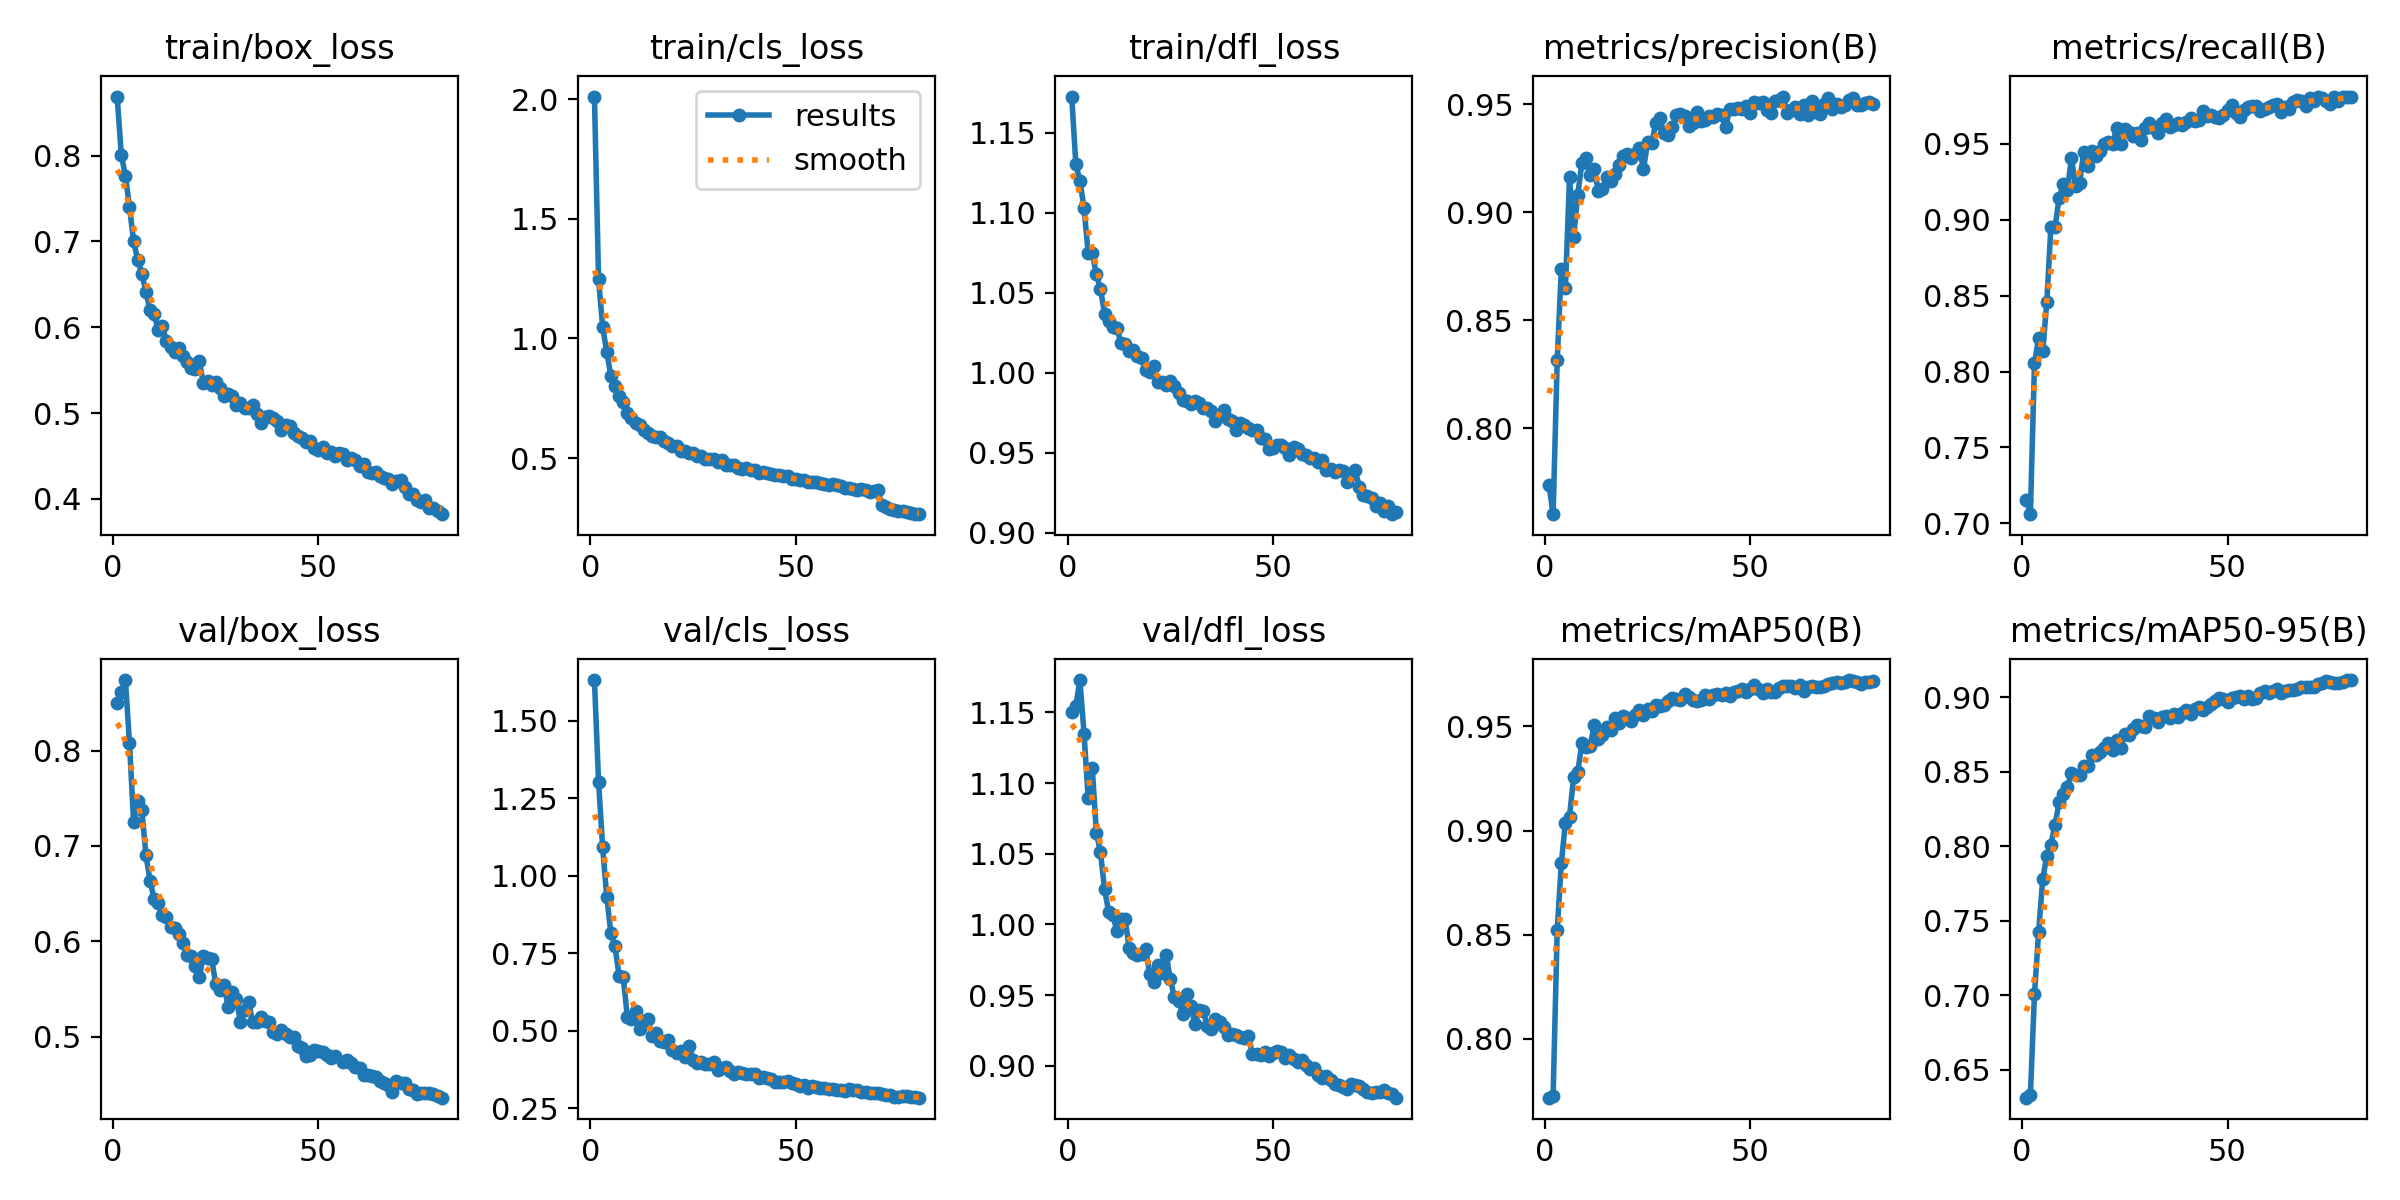

In [ ]:
display(Image(filename='/content/runs/detect/train2/results.png', width=600))

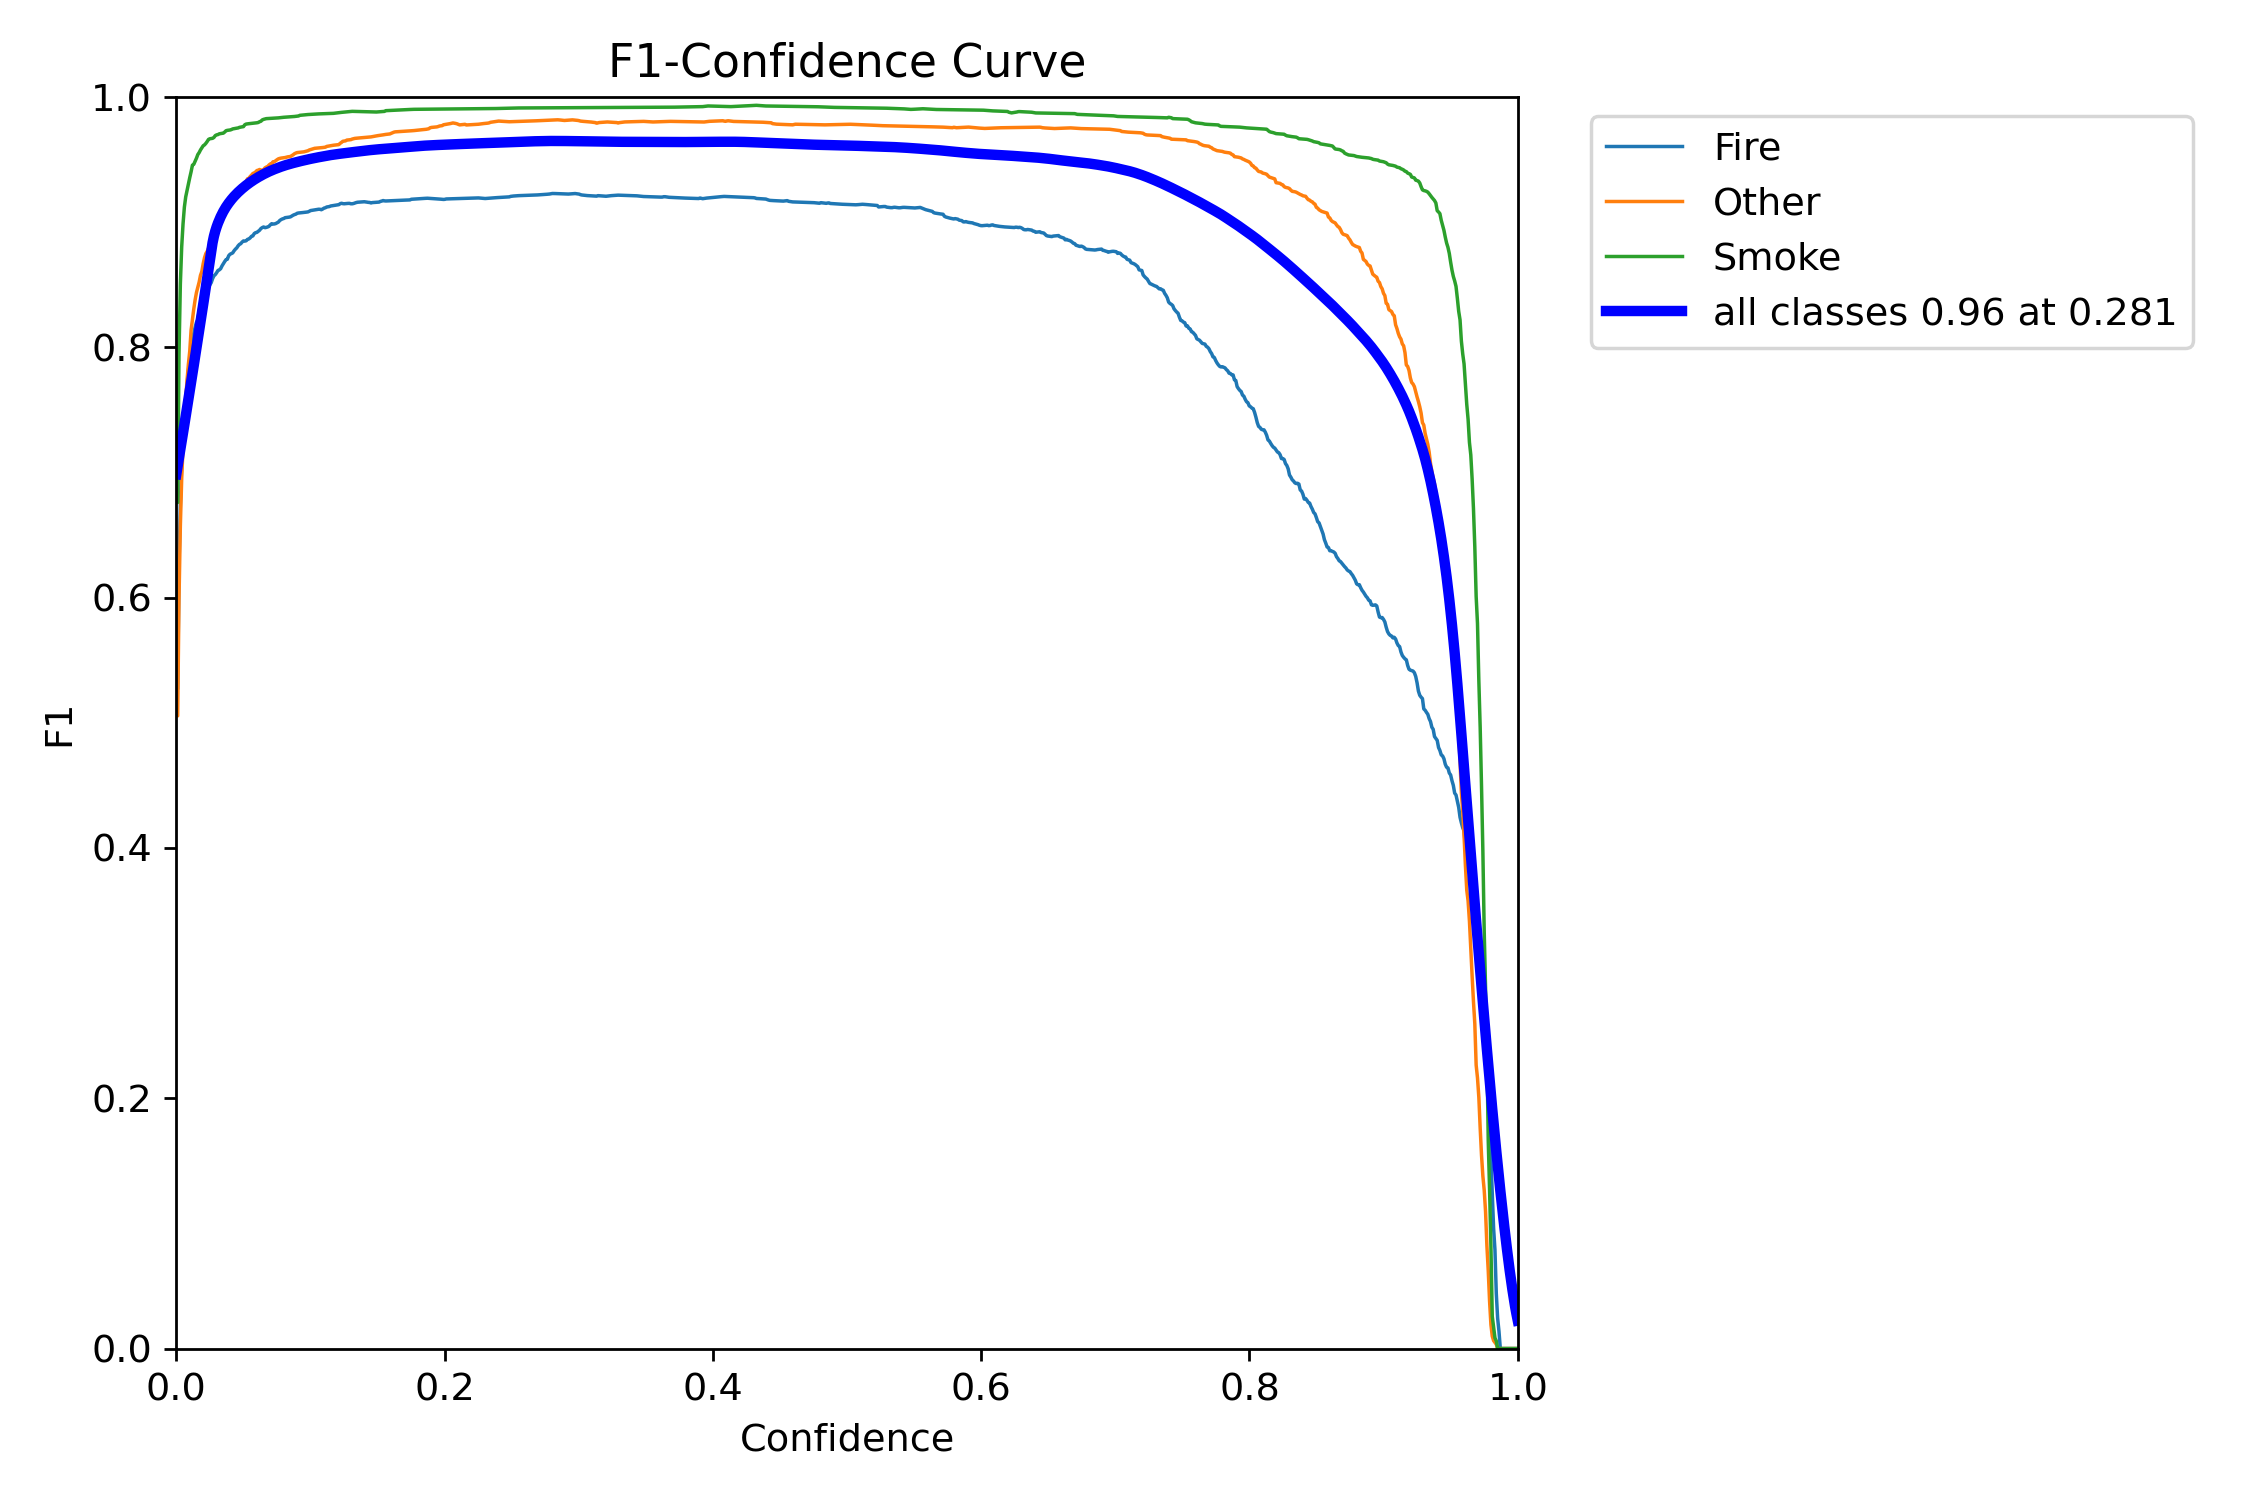

In [ ]:
display(Image(filename='/content/runs/detect/train2/F1_curve.png', width=600))

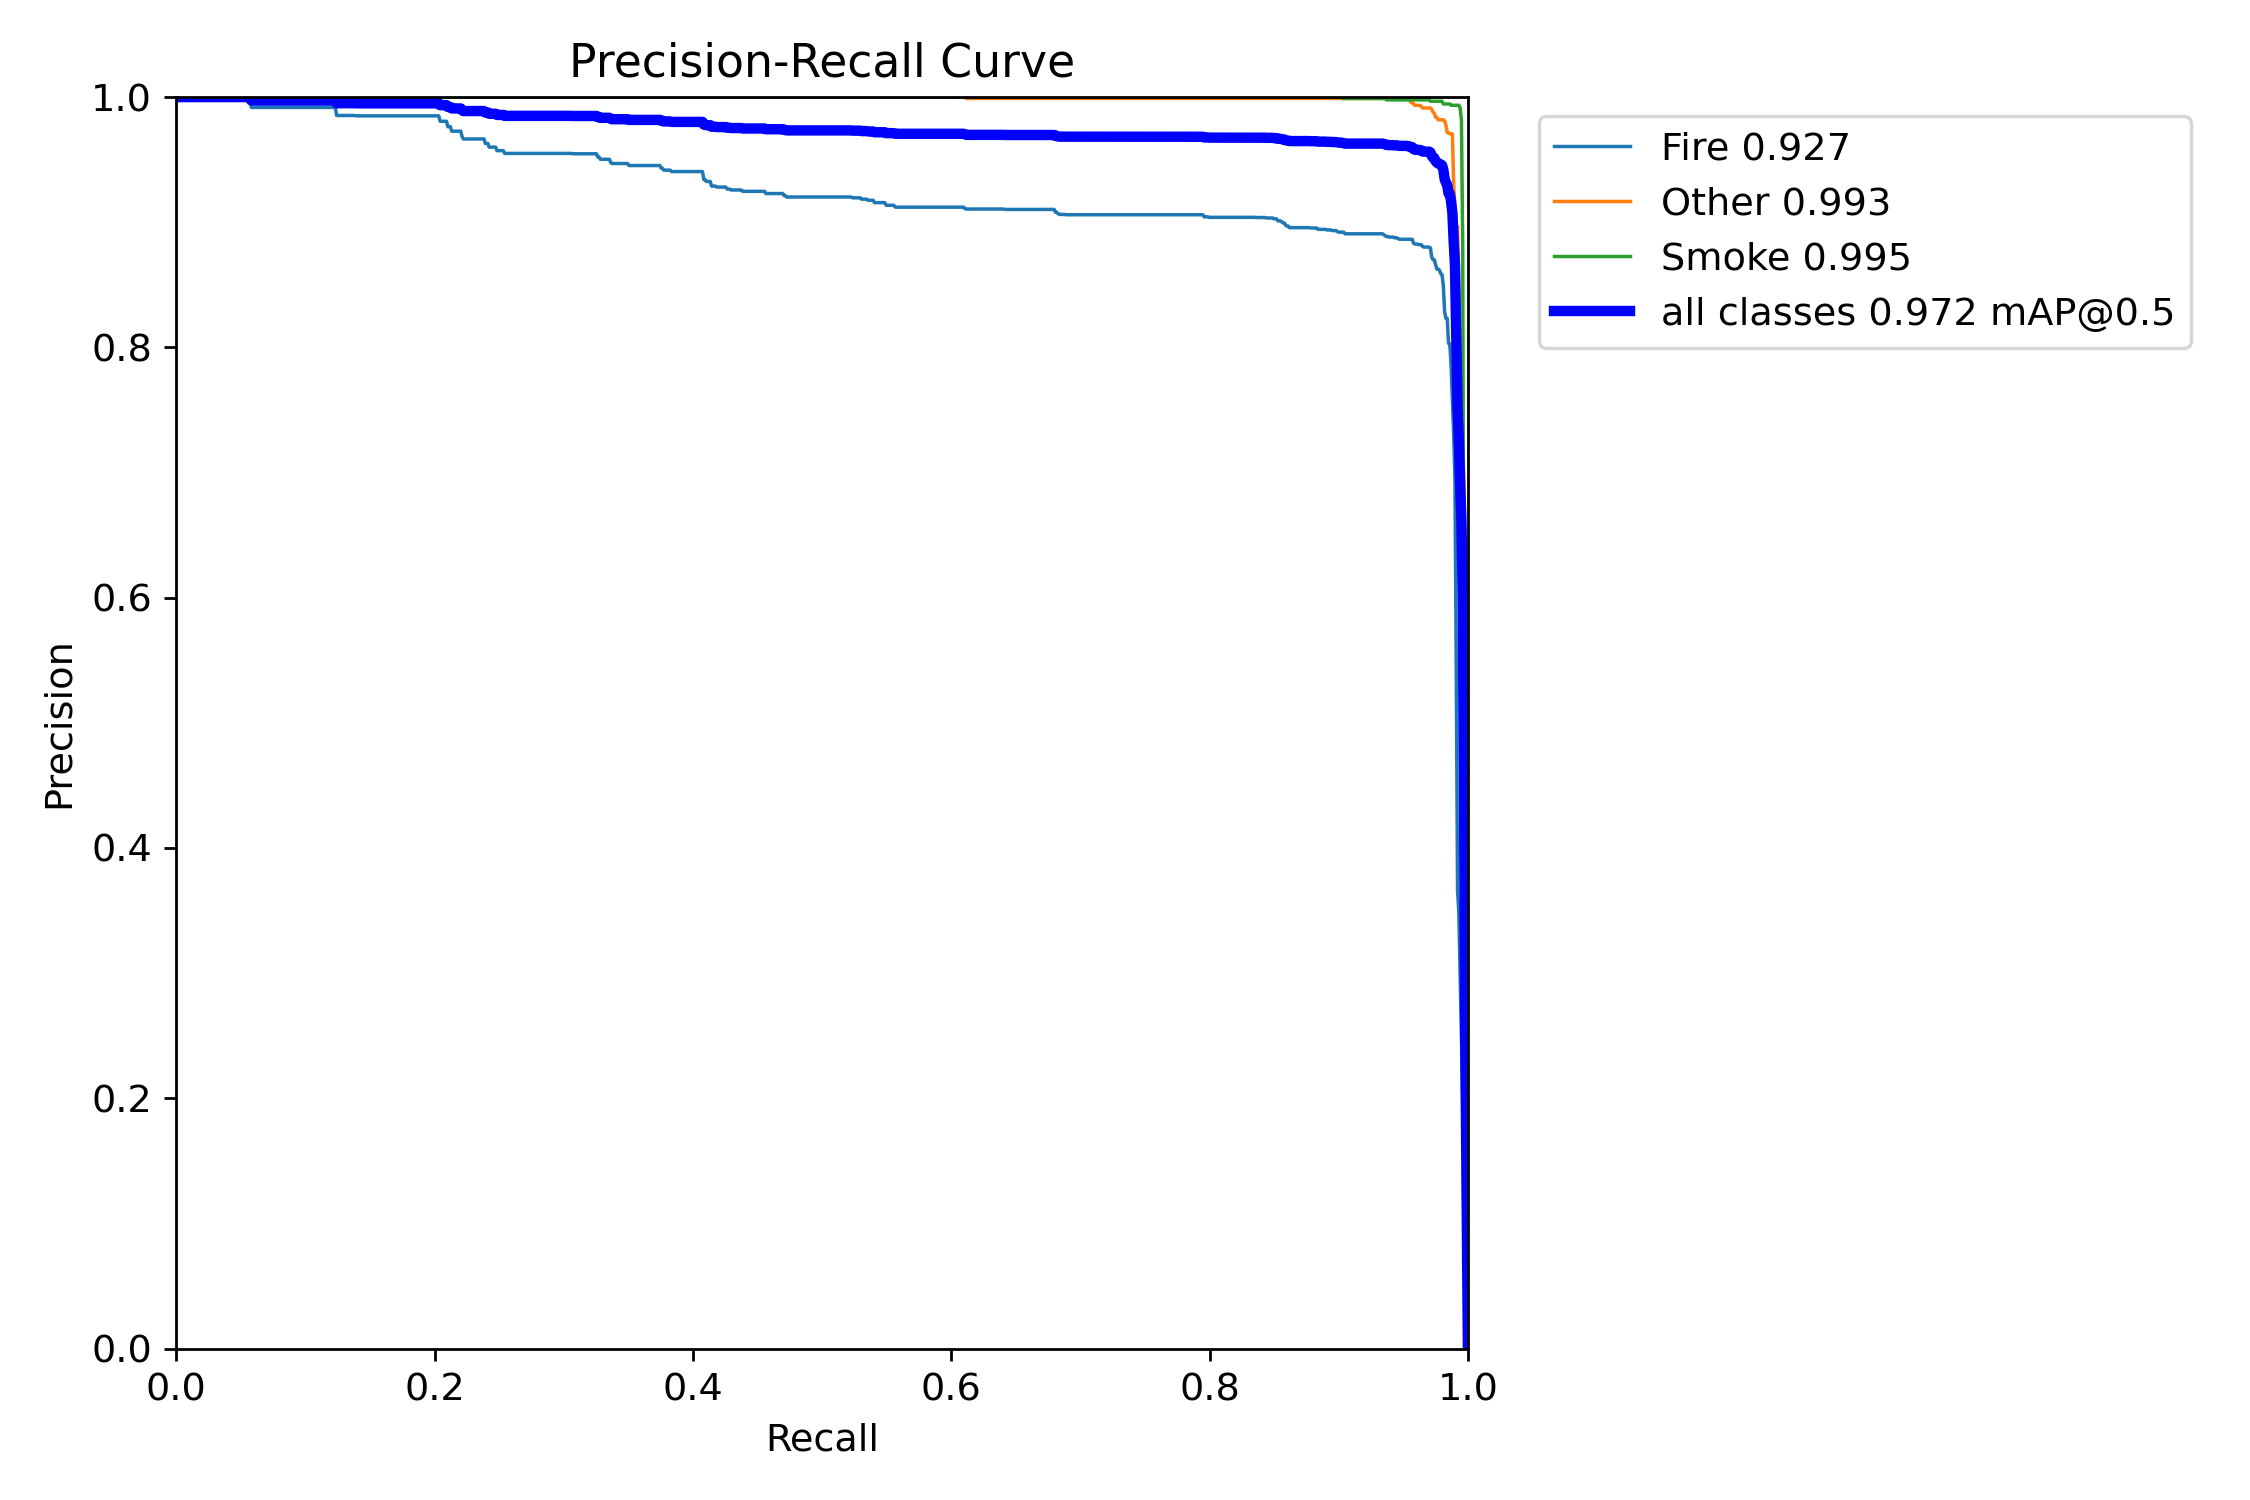

In [ ]:
display(Image(filename='/content/runs/detect/train2/PR_curve.png', width=600))

### **Validate fine-tuned model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/Fire-and-Smoke-Detection-5/data.yaml

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Fire-and-Smoke-Detection-5/valid/labels.cache... 1492 images, 0 backgrounds, 0 corrupt: 100% 1492/1492 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 94/94 [00:16<00:00,  5.74it/s]
                   all       1492       2821       0.95      0.981      0.972      0.911
                  Fire        700        969       0.88      0.969      0.927      0.841
                 Other        432        936      0.983      0.979      0.993      0.924
                 Smoke        674        916      0.987      0.995      0.995       0.97
Speed: 0.7ms preprocess, 3.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# **Inference with custom model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/Fire-and-Smoke-Detection-5/test/images save=True

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1299 /content/Fire-and-Smoke-Detection-5/test/images/fire1_mp4-26_jpg.rf.0b59bf2d9cd53c54931391d33eb0ee14.jpg: 640x640 1 Fire, 14.7ms
image 2/1299 /content/Fire-and-Smoke-Detection-5/test/images/fire2_mp4-29_jpg.rf.ca2bf585b718996373715a45377fd04a.jpg: 640x640 1 Fire, 8.8ms
image 3/1299 /content/Fire-and-Smoke-Detection-5/test/images/fire2_mp4-37_jpg.rf.7815ab66b310cdfa7df98c8eb2cf4080.jpg: 640x640 1 Fire, 8.5ms
image 4/1299 /content/Fire-and-Smoke-Detection-5/test/images/fire2_mp4-50_jpg.rf.bd9012826bcda0067172152bf2adf6e0.jpg: 640x640 1 Fire, 8.5ms
image 5/1299 /content/Fire-and-Smoke-Detection-5/test/images/fire2_mp4-51_jpg.rf.780eadb20bc5feeedfdeec6a95d4e991.jpg: 640x640 1 Fire, 8.1ms
image 6/1299 /content/Fire-and-Smoke-Detection-5/test/images/fire2_mp4-56_jpg.rf.23f73483354e3b5db0486bce8b39124a.jpg: 640x640 1

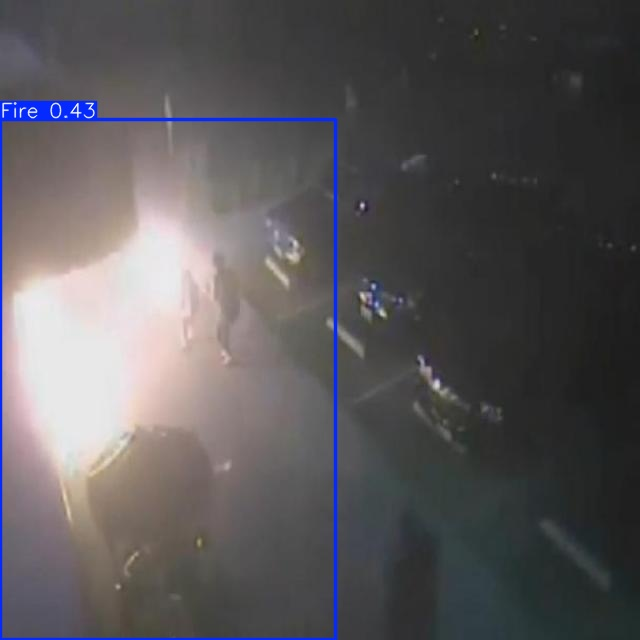

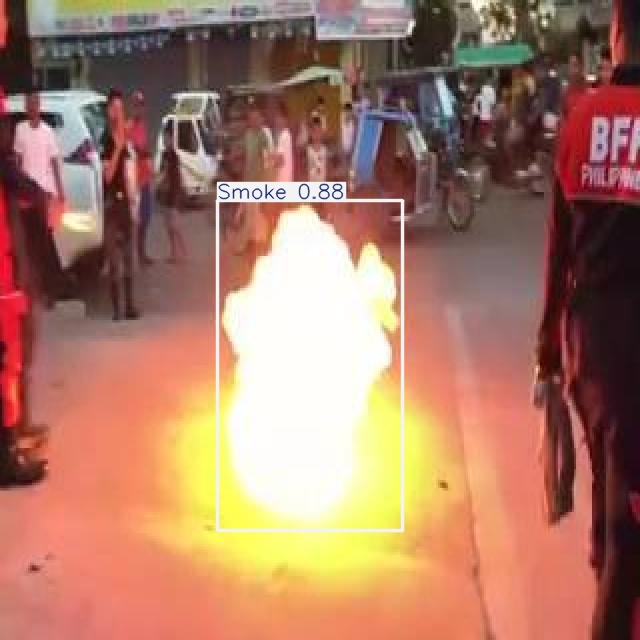

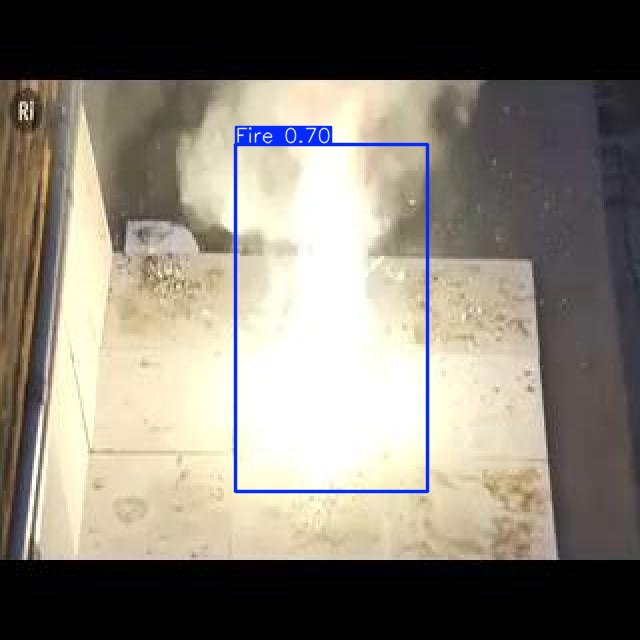

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")